# **The Irish Times News 2021 - Word Cloud**

**Description**

[The Irish Times](https://www.irishtimes.com/about-us/the-irish-times-trust) is an Irish daily newspaper published since 1859. It is a popular source of information in Ireland and features the most debated topics in Irish society.

**Objective**

Generating a Word Cloud with The Irish Times headlines published in the News category in the first half of 2021.

Start Date: 2021-01-01

End Date: 2021-06-30.

**Source**

The Irish Times: 

https://www.irishtimes.com/about-us/the-irish-times-trust

Dataset: 

https://www.kaggle.com/therohk/ireland-historical-news

Word Cloud Documentation and Examples: 

https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

https://amueller.github.io/word_cloud/auto_examples/parrot.html#sphx-glr-auto-examples-parrot-py

Flag (Pixabay License. Free for commercial use. No attribution required.): 

https://pixabay.com/illustrations/ireland-flag-banner-green-white-1179257/

# **Settings**

In [1]:
# Mounting drive using Google Colab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing libraries.
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import os
from os import path
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

# **Exploratory Analysis**

In [3]:
# Reading the csv file.
inews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IrishTimesNews/ireland-news-headlines.csv')

In [4]:
# General info about the dataset: class, entries, columns, non-null count, data type and memory usage.
inews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611495 entries, 0 to 1611494
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   publish_date       1611495 non-null  int64 
 1   headline_category  1611495 non-null  object
 2   headline_text      1611488 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.9+ MB


In [5]:
# First five lines of the dataset, including the headline.
inews.head()

,publish_date,headline_category,headline_text
0,19960102,news,UUP sees possibility of voting Major out
1,19960102,news,Pubs targeted as curbs on smoking are extended
2,19960102,news,Papers reveal secret links with O'Neill cabinet
3,19960102,news,Domestic chaos as Italy takes EU presidency
4,19960102,news,Learning about the star to which we owe life


In [6]:
# Counting the number of unique values per headline_category.
pd.value_counts(inews['headline_category'])

news                               580242
sport                              158683
business                           111435
opinion.letters                     79276
opinion                             49946
                                    ...  
lifestyle.food.restaurant             203
news.technology                       191
business.markets.bonds                127
lifestyle.abroad.working-abroad       116
news.health.coronavirus               104
Name: headline_category, Length: 103, dtype: int64

In [7]:
# Creating the variable headline_category_news based on the column headline_category to eliminate subcategories.
headline_category_news = inews['headline_category'].str[0:4]

In [8]:
# Adding the variable into the dataset.
inews['headline_category_news'] = headline_category_news

In [9]:
# First five lines of the dataset, including the headline, with the new variable.
inews.head()

,publish_date,headline_category,headline_text,headline_category_news
0,19960102,news,UUP sees possibility of voting Major out,news
1,19960102,news,Pubs targeted as curbs on smoking are extended,news
2,19960102,news,Papers reveal secret links with O'Neill cabinet,news
3,19960102,news,Domestic chaos as Italy takes EU presidency,news
4,19960102,news,Learning about the star to which we owe life,news


In [10]:
# Counting the number of unique values per headline_category.
pd.value_counts(inews['headline_category_news'])

news    798684
spor    261827
busi    222960
opin    133073
cult     98945
life     96006
Name: headline_category_news, dtype: int64

In [11]:
# Creating an array to keep only the category news.
inews.headline_category_news.unique()

array(['news', 'cult', 'opin', 'busi', 'spor', 'life'], dtype=object)

In [12]:
# Selecting only the category news.
inews = inews[inews['headline_category_news']=='news']

In [13]:
# Counting the number of unique values per headline_category.
pd.value_counts(inews['headline_category_news'])

news    798684
Name: headline_category_news, dtype: int64

In [14]:
# Filtering news from 2021.
year = inews[inews['publish_date'] > 20210000]

In [15]:
year

,publish_date,headline_category,headline_text,headline_category_news
1583169,20210101,news.social,Irish babies born on January 1st expected to l...,news
1583170,20210101,news.world.uk,Brexit: End of an era as United Kingdom fully ...,news
1583171,20210101,news.world,Covid-19: Canadian minister resigns after flou...,news
1583172,20210101,news.health,Coronavirus: 1;754 new cases and 11 more death...,news
1583173,20210101,news.politics,Ireland takes seat on powerful UN Security Cou...,news
...,...,...,...,...
1611487,20210630,news.ireland,Man admits firing shots at gardaí and leading ...,news
1611488,20210630,news.politics,Miriam Lord: Government regains composure afte...,news
1611489,20210630,news.ireland,Man jailed for two years for sexual assault of...,news
1611490,20210630,news.politics.oireachtas,Reserve members of Defence Forces to be allowe...,news


In [16]:
# Counting the number of unique values per headline_category, which means the subcategories of the category news.
pd.value_counts(year['headline_category'])

news.ireland                      2240
news.politics                     1197
news.health                       1059
news.law                           839
news.world.europe                  694
news.world.us                      670
news.education                     483
news.social                        397
news.world.asia-pacific            380
news.world.uk                      369
news.law.courts.high-court         347
news.environment                   313
news.world                         239
news.world.middle-east             237
news.law.courts.circuit-court      196
news.politics.oireachtas           181
news.world.africa                  166
news.science                       134
news.law.courts.criminal-court     130
news.law.courts                    121
news.social.beliefs                115
news.law.courts.district-court      92
news.consumer                       78
news                                64
news.offbeat                        29
news.health.coronavirus  

In [17]:
# Creating a dataframe with the headlines from 2021.
headline_text_df = year[['headline_text']]

In [18]:
headline_text_df

,headline_text
1583169,Irish babies born on January 1st expected to l...
1583170,Brexit: End of an era as United Kingdom fully ...
1583171,Covid-19: Canadian minister resigns after flou...
1583172,Coronavirus: 1;754 new cases and 11 more death...
1583173,Ireland takes seat on powerful UN Security Cou...
...,...
1611487,Man admits firing shots at gardaí and leading ...
1611488,Miriam Lord: Government regains composure afte...
1611489,Man jailed for two years for sexual assault of...
1611490,Reserve members of Defence Forces to be allowe...


In [19]:
# Exporting the dataframe to a csv file. Later, turning it into a text file.
headline_text_df.to_csv('news.csv', index=False, header=False)

# **Word Cloud**

In [20]:
# Getting a data directory using getcwd() to support running example in generated Python notebook.
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [21]:
# Creating a variable and reading the text file.
text = open(path.join(d, '/content/drive/MyDrive/Colab Notebooks/IrishTimesNews/news.txt')).read()

In [22]:
# Generating a word cloud image.
wordcloud = WordCloud().generate(text)

In [23]:
# Creating a variable and reading the jpg file.
flag_color = np.array(Image.open(os.path.join(d, '/content/drive/MyDrive/Colab Notebooks/IrishTimesNews/flag.jpg')))
# Subsampling by factor of 3.
flag_color = flag_color[::3, ::3]

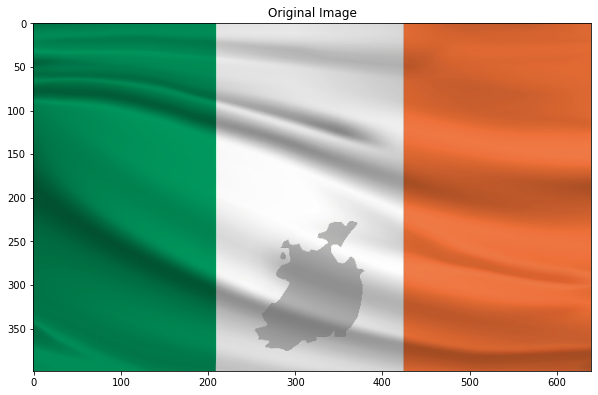

In [24]:
# Showing the original image of the flag of Ireland.
plt.figure(figsize=(10, 10))
plt.title('Original Image')
plt.imshow(flag_color)

In [25]:
# Creating a flag mask.
flag_mask = flag_color.copy()
flag_mask[flag_mask.sum(axis=2) == 0] = 255

In [26]:
# Creating a word cloud based on word rank without considering frequencies (relative_scaling=0).
wc = WordCloud(max_words=2000, mask=flag_mask, max_font_size=40, random_state=42, relative_scaling=0)

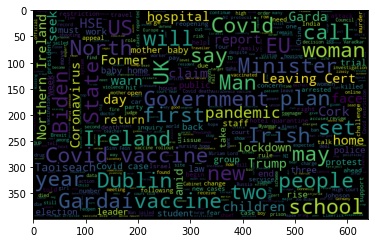

In [27]:
# Generating the word cloud.
wc.generate(text)
plt.imshow(wc)

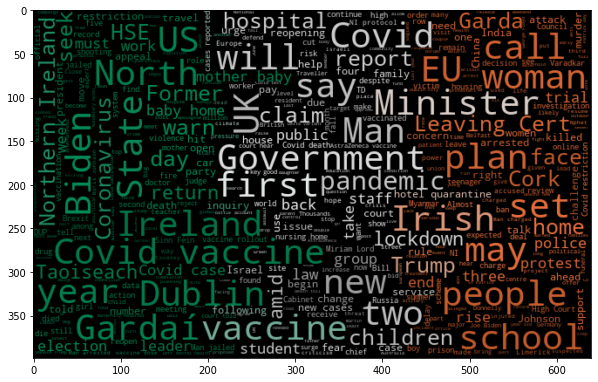

In [29]:
# Generating the word cloud based on the image. Saving it as a png file.
image_colors = ImageColorGenerator(flag_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file('flag_wordcloud.png')

# **Analysis**

✔️ The Irish Times dataset presents 1611495 entries and three columns:

* Publish Date
* Headline Category
* Headline Text

✔️ After eliminating subcategories, it is possible to observe that there are six major categories:

* news
* sports
* business
* opinion
* culture
* lifestyle

✔️ News is the category with the highest number of entries, from 1996-01-01 to 2021-06-30, totaling 798684 entries.

✔️ There are 10830 headlines regarding news in the first semester of 2021, which were selected to generate a word cloud.

✔️ News subcategories and occurences in 2021:

news.ireland                      2240

news.politics                     1197

news.health                       1059

news.law                           839

news.world.europe                  694

news.world.us                      670

news.education                     483

news.social                        397

news.world.asia-pacific            380

news.world.uk                      369

news.law.courts.high-court         347

news.environment                   313

news.world                         239

news.world.middle-east             237

news.law.courts.circuit-court      196

news.politics.oireachtas           181

news.world.africa                  166

news.science                       134

news.law.courts.criminal-court     130

news.law.courts                    121

news.social.beliefs                115

news.law.courts.district-court      92

news.consumer                       78

news                                64

news.offbeat                        29

news.health.coronavirus             23

news.law.courts.coroners-court      19

news.law.courts.supreme-court       18

✔️ After creating a word cloud based on word rank, it is possible to observe that 50 of the most used words in the news headlines in the first semester of 2021, in alphabetical order, are:

1. Back
2. Biden
3. Case
4. Children
5. Claim
6. Cork
7. Coronavirus
8. Covid
9. Dublin
10. Election
11. End
12. EU
13. Face
14. First
15. Former
16. Garda
17. Gardaí
18. Government
19. Home
20. Hospital
21. HSE
22. Ireland
23. Irish
24. Leader
25. Leaving
26. Lockdown
27. Man
28. Minister
29. New
30. North
31. Northern Ireland
32. Pandemic
33. Plan
34. Police
35. Protest
36. Public
37. Report
38. Return
39. Service
40. Staff
41. Taoiseach
42. Three
43. Trial
44. Trump
45. Two
46. UK
47. US
48. Vaccine
49. Woman
50. Year


💡 The Word Cloud generated from The Irish Times headlines published in the News category in the first half of 2021 illustrates that the Covid pandemic and its political influences were the most debated topics in Irish society. This information is not surprising, but it could lead to further analysis.